In [32]:
#1. lectura de datos 
datos <- read.csv("fci_students.csv",header=TRUE,sep=";",dec=",")
datos[1:10,]

#2. análisis exploratorio de datos:

dim(datos)
summary(datos)

student_id,start_year,start_year_mod,program_id,reprobadas_sem1,aprobadas_sem1,anuladas_sem1,cursadas_sem1,cursadas_sem3,gpa_sem1,Permanencia
00949132a43fb01342e71b82fd7e46,2018,0,1807,0,6,0,6,5,4.80,1
043d2f89c95055115a73b0b7095d24,2017,0,1740,6,0,0,6,0,1.00,1
053fcec6c777193754ab8313f7ed9f,2018,0,1807,0,8,0,8,5,5.05,1
098ca3cd792b1aeb880afad52f8005,2017,0,1736,1,9,0,10,4,4.36,0
098ddd38e641cb7a2d0003de9638d7,2017,0,1807,1,4,1,6,5,4.65,1
09fffde5d88320d2664aebc7219403,2018,0,1737,0,6,0,6,6,5.48,1
0a1c99873b1bf84931803cb077f129,2020,1,1708,0,4,1,5,4,5.87,1
0bb806ca96706e9790d92a9d27aa2f,2021,1,1807,0,11,0,11,10,5.35,1
0c4a55a4ed9914b153b4867301f993,2020,1,1807,0,11,0,11,10,5.58,0
0fe5ab4f3df38493e8cc71afe37e45,2017,0,1708,3,2,0,5,6,3.59,1


[1] 2028   11

                          student_id     start_year   start_year_mod  
 004d6a77c956dea2e94c18f8f3965d:   1   Min.   :2017   Min.   :0.0000  
 0050b3d80b41ade5455e8f87d47d9b:   1   1st Qu.:2017   1st Qu.:0.0000  
 008419d0eb1f05d4050a9754dc6043:   1   Median :2018   Median :0.0000  
 00949132a43fb01342e71b82fd7e46:   1   Mean   :2019   Mean   :0.4532  
 00a4082a181ca3ed3ece8f039c7d76:   1   3rd Qu.:2020   3rd Qu.:1.0000  
 00b766201f72e60666f22c02317a5d:   1   Max.   :2021   Max.   :1.0000  
 (Other)                       :2022                                  
   program_id   reprobadas_sem1  aprobadas_sem1   anuladas_sem1   
 Min.   :1704   Min.   : 0.000   Min.   : 0.000   Min.   :0.0000  
 1st Qu.:1708   1st Qu.: 0.000   1st Qu.: 3.000   1st Qu.:0.0000  
 Median :1737   Median : 1.000   Median : 5.000   Median :0.0000  
 Mean   :1751   Mean   : 1.401   Mean   : 4.903   Mean   :0.1272  
 3rd Qu.:1779   3rd Qu.: 2.000   3rd Qu.: 6.000   3rd Qu.:0.0000  
 Max.   :1822   Max.   :10.000

In [10]:
install.packages("corrplot")
library("corrplot")


  There is a binary version available but the source version is later:
         binary source needs_compilation
corrplot   0.88   0.92             FALSE



installing the source package 'corrplot'


corrplot 0.92 loaded



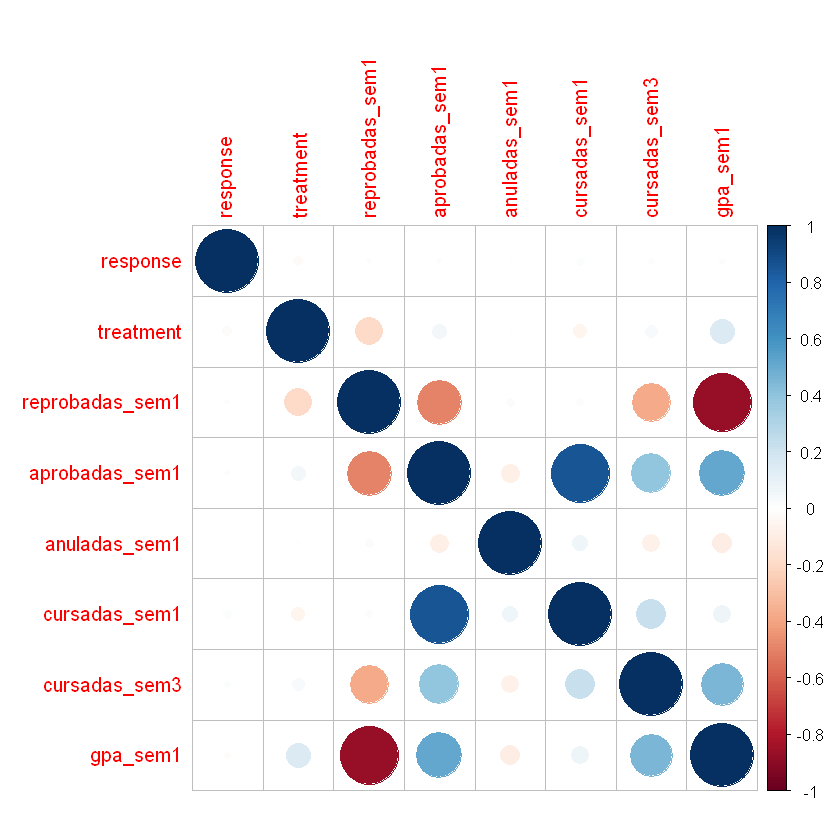

In [11]:
#definición de variables
response<-datos[,11]
treatment <- datos[,3]
confounders <- datos[,5:10]



dataT <- cbind(response,treatment,confounders)
corDatos <- cor(dataT)
corrplot(corDatos)

In [12]:
#análisis de independencia respuesta vs tratamiento
tab <- table(response, treatment)
print(tab)
chisq.test(cbind(as.factor(response),as.factor(treatment)))

        treatment
response   0   1
       0 185 171
       1 924 748


Warning message in chisq.test(cbind(as.factor(response), as.factor(treatment))):
"Chi-squared approximation may be incorrect"



	Pearson's Chi-squared test

data:  cbind(as.factor(response), as.factor(treatment))
X-squared = 283.33, df = 2027, p-value = 1


In [18]:
#Pasos a seguir (artículo BART)

#BART (Bayesian Additive Regression Trees) es un modelo estadístico que combina árboles de regresión aditiva con inferencia bayesiana.

#1) Preparación de datos-> OK excel

#2) Instalación de paquetes

#3) Desarrollo modelo:

    #Parámetros
    #Hiperparámetros 
        #Número de arboles-> relación entre las variables de entrada y la variable de salida
            #*Un mayor número de árboles puede aumentar la capacidad del modelo, pero también puede aumentar el tiempo de entrenamiento.
        #Profundidad de árboles-> profundidad máxima que pueden alcanzar los árboles en el modelo
            #*Una mayor profundidad permite un mayor ajuste a los datos
    #Distribuciones previas ->ayudan a controlar la complejidad del modelo y evitan el sobreajuste. (Media y Varianza)

#4) Ajustar modelo a datos (utilizar MCMC) -> algoritmo adecuado a parámetros del modelo
    #Este proceso de ajuste tiene objetivo de encontrar la distribución posterior de los parámetros

#5) Evaluar modelo -> métricas, precisión, incertidumbre de predicciones (intervalos de credibilidad o distrib)

#6) Interpretación de resultados

#7) Predicciones (con modelo BART ajustado)

#Referencia-> https://cran.r-project.org/web/packages/bartMachine/bartMachine.pdf



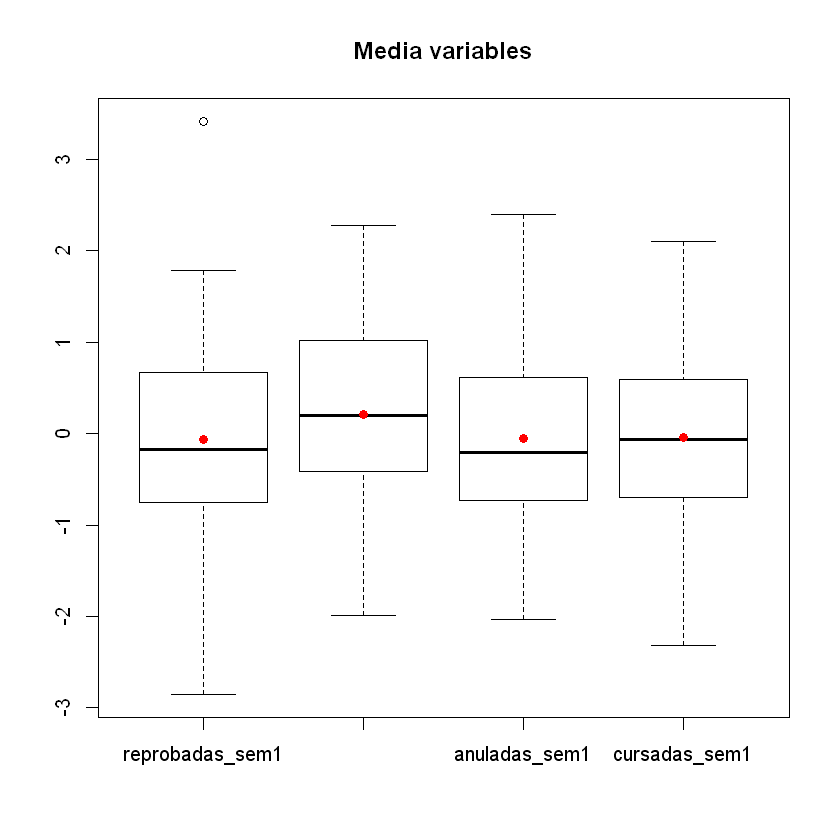

In [13]:
datos <- data.frame(
  reprobadas_sem1 = rnorm(100),
  aprobadas_sem1 = rnorm(100),
  anuladas_sem1 = rnorm(100),
    cursadas_sem1 = rnorm(100)
)

means <- colMeans(datos)

boxplot(datos)

points(x = 1:length(means), y = means, col = "red", pch = 19)

names <- c('reprobadas_sem1', 'aprobadas_sem1', 'anuladas_sem1', 'cursadas_sem1')
axis(1, at=1:4, labels=names)
title(main='Media variables')

In [14]:
library(BayesTree)

In [15]:
#formula <- y ~ x1 + x2 + x3 + x4 + x5

In [17]:
y= as.factor(response)

summary(confounders)
x1 = confounders[,1]
x2 = confounders[,2]
x3 = confounders[,4]
x4 = confounders[,5]
x5 = confounders[,6]

formula <- y ~ x1 + x2 + x3 + x4 + x5

model <- bart(formula, data = datos, num_trees = 100, num_burnin = 100, num_iterations = 200)

 reprobadas_sem1  aprobadas_sem1   anuladas_sem1    cursadas_sem1   
 Min.   : 0.000   Min.   : 0.000   Min.   :0.0000   Min.   : 0.000  
 1st Qu.: 0.000   1st Qu.: 3.000   1st Qu.:0.0000   1st Qu.: 6.000  
 Median : 1.000   Median : 5.000   Median :0.0000   Median : 6.000  
 Mean   : 1.401   Mean   : 4.903   Mean   :0.1272   Mean   : 6.431  
 3rd Qu.: 2.000   3rd Qu.: 6.000   3rd Qu.:0.0000   3rd Qu.: 7.000  
 Max.   :10.000   Max.   :55.000   Max.   :6.0000   Max.   :56.000  
 cursadas_sem3       gpa_sem1    
 Min.   : 0.000   Min.   :0.000  
 1st Qu.: 3.000   1st Qu.:3.900  
 Median : 5.000   Median :4.650  
 Mean   : 4.272   Mean   :4.479  
 3rd Qu.: 6.000   3rd Qu.:5.220  
 Max.   :30.000   Max.   :6.680  

ERROR: Error in bart(formula, data = datos, num_trees = 100, num_burnin = 100, : unused arguments (data = datos, num_trees = 100, num_burnin = 100, num_iterations = 200)


In [24]:
model <- bartMachine(formula, data = datos, ntree = 100)

ERROR: Error in bartMachine(formula, data = datos, ntree = 100): no se pudo encontrar la función "bartMachine"


In [25]:
model <- bartMachine(formula, data = tu_data_frame, ndpost = 5)

ERROR: Error in bartMachine(formula, data = tu_data_frame, ndpost = 5): no se pudo encontrar la función "bartMachine"


In [ ]:
#(1) $$Y = f\left ( x \right ) + \varepsilon$$
#(2) $$Y = f\left ( x \right ) + \varepsilon ,  \varepsilon \sim N\left ( 0,\sigma ^{2} \right )$$
#(3) $$Y=g\left ( x; T,M \right )+\varepsilon , \varepsilon \sim N\left ( 0,\sigma ^{2} \right )$$
#(4) $$Y=\sum_{j=1}^{m} g\left ( x; T_{j},M_{j} \right )+\varepsilon , \varepsilon \sim N\left ( 0,\sigma ^{2} \right )$$
#(5) $$p\left ( \left ( T_{1},M_{1} \right ),...,\left ( T_{m},M_{m} \right ),\sigma  \right )=\left [ \prod_{j}^{}p\left ( T_{j},M_{j} \right ) \right ]p\left ( \sigma  \right )$$
#(6) $$p\left ( M_{j}\mid T_{j} \right )=\prod_{i}^{}p\left ( \mu _{ij}\mid T_{j} \right )$$

In [ ]:
#Ecuaciones modelo BART

$$ Y = f\left ( x \right ) + \varepsilon $$

$$Y = f\left ( h \right ) + \varepsilon$$

$$Y = f\left ( x \right ) + \varepsilon ,  \varepsilon \sim N\left ( 0,\sigma ^{2} \right )$$

$$Y = f\left ( h \right ) + \varepsilon ,  \varepsilon \sim N\left ( 0,\sigma ^{2} \right )$$

$$Y=g\left ( x; T,M \right )+\varepsilon , \varepsilon \sim N\left ( 0,\sigma ^{2} \right )$$

$$Y=\sum_{j=1}^{m} g\left ( x; T_{j},M_{j} \right )+\varepsilon , \varepsilon \sim N\left ( 0,\sigma ^{2} \right )$$

$$p\left ( \left ( T_{1},M_{1} \right ),...,\left ( T_{m},M_{m} \right ),\sigma  \right )=\left [ \prod_{j}^{}p\left ( T_{j},M_{j} \right ) \right ]p\left ( \sigma  \right )$$

$$p\left ( M_{j}\mid T_{j} \right )=\prod_{i}^{}p\left ( \mu _{ij}\mid T_{j} \right )$$

In [34]:
#Ejemplo construcción modelos con BayesTree

x1 <- datos[,5]
x2 <- datos[,6]
x3 <- datos[,7]
x4 <- datos[,8]
x5 <- datos[,9]
x6 <- datos[,10]
response <- datos[,11]

predictors <- cbind(x1, x2, x3, x4, x5, x6)

datosF <- data.frame(predictors, response)

In [37]:
y= as.factor(response)

formula <- y ~ x1 + x2 + x3 + x4 + x5

model <- bart(predictors,response, ntree = 100)

NOTE: assumming numeric response is binary


Running BART with binary y

number of trees: 100
Prior:
	k: 2.000000
	binary offset is: 0.000000
	power and base for tree prior: 2.000000 0.950000
	use quantiles for rule cut points: 0
data:
	number of training observations: 2028
	number of test observations: 0
	number of explanatory variables: 6


Cutoff rules c in x<=c vs x>c
Number of cutoffs: (var: number of possible c):
(1: 100) (2: 100) (3: 100) (4: 100) (5: 100) 
(6: 100) 


Running mcmc loop:
iteration: 100 (of 1100)
iteration: 200 (of 1100)
iteration: 300 (of 1100)
iteration: 400 (of 1100)
iteration: 500 (of 1100)
iteration: 600 (of 1100)
iteration: 700 (of 1100)
iteration: 800 (of 1100)
iteration: 900 (of 1100)
iteration: 1000 (of 1100)
iteration: 1100 (of 1100)
time for loop: 39

Tree sizes, last iteration:
2 2 2 1 2 3 1 2 1 2 2 3 2 2 2 2 2 2 2 2 
3 2 1 2 2 3 2 2 2 2 2 3 2 3 3 2 1 2 1 2 
3 3 2 3 3 2 3 2 2 3 2 1 2 2 2 2 2 4 2 2 
2 2 2 2 2 2 2 2 2 3 1 2 2 3 1 2 1 2 2 3 
2 2 1 2 2 2 